In [22]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pandas as pd
import glob
import os
import cv2
import random as rand
import time
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from mtcnn.mtcnn import MTCNN
import insightface
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Defining some test images..

In [23]:
test_img = glob.glob('../test images/*.[jJ][Pp][Gg]')

In [100]:
single_person = glob.glob('../test images/single/*')
three_person = glob.glob('../test images/three/*')
ten_person = glob.glob('../test images/ten/*')

In [24]:
def exec_time(start, end):
    diff_time = end - start
    return diff_time

### Showing average inference time on different crowd sizes

#### Haar Cascade

##### Single person

In [58]:
haar_single = time_haar(single_person)
print(f'Haar cascade average inference time for 1 person: {haar_single}')

Haar cascade average inference time for 1 person: 0.15622916221618652


##### Three  persons

In [87]:
haar_three = time_haar(three_person)
print(f'Haar cascade average inference time for 3 person: {haar_three}')

Haar cascade average inference time for 3 person: 0.19666051864624023


##### Ten persons

In [101]:
haar_ten = time_haar(ten_person)
print(f'Haar cascade average inference time for 10 persons: {haar_ten}')

Haar cascade average inference time for 10 persons: 0.2774343490600586


#### MTCNN

##### Single Person

In [77]:
mtcnn_single = time_mtcnn(single_person)
print(f'MTCNN average inference time for 1 person: {mtcnn_single}')

MTCNN average inference time for 1 person: 1.1105024814605713


In [89]:
mtcnn_three = time_mtcnn(three_person)
print(f'Haar cascade average inference time for 3 person: {mtcnn_three}')

Haar cascade average inference time for 3 person: 1.219171667098999


In [102]:
mtcnn_ten = time_mtcnn(ten_person)
print(f'Haar cascade average inference time for 10 person: {mtcnn_ten}')

Haar cascade average inference time for 10 person: 1.3053486347198486


#### Retina Face

###### Single Person

In [59]:
retina_single = time_retina(single_person)
print(f'Retina face average inference time for 1 person: {retina_single}')

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True
Retina face average inference time for 1 person: 5.7792621612548825


#### Three person

In [90]:
retina_three = time_retina(three_person)
print(f'Retina face average inference time for 3 persons: {retina_three}')

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True
Retina face average inference time for 3 persons: 6.377745914459228


##### Ten persons

In [104]:
retina_ten = time_retina(ten_person)
print(f'Retina face average inference time for 10 persons: {retina_ten}')

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True
Retina face average inference time for 10 persons: 5.82368929045541


### Showing Results on different crowd sizes

Note that for comparison purposes, we selected based on default parameters.

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


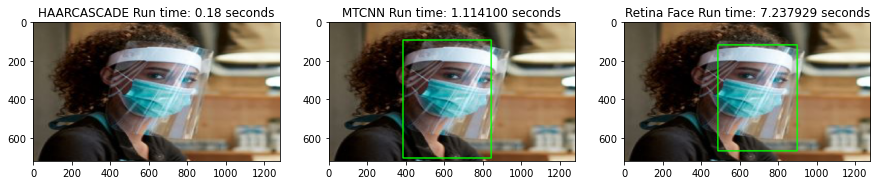

In [41]:
fig, axes = plt.subplots(1,3, figsize=(15,15))
warnings.filterwarnings("ignore")
for mod, i  in zip(['haar','mtcnn','retina'], [0,1,2]):
    predict(test_img[15] ,mod, axes[i])

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


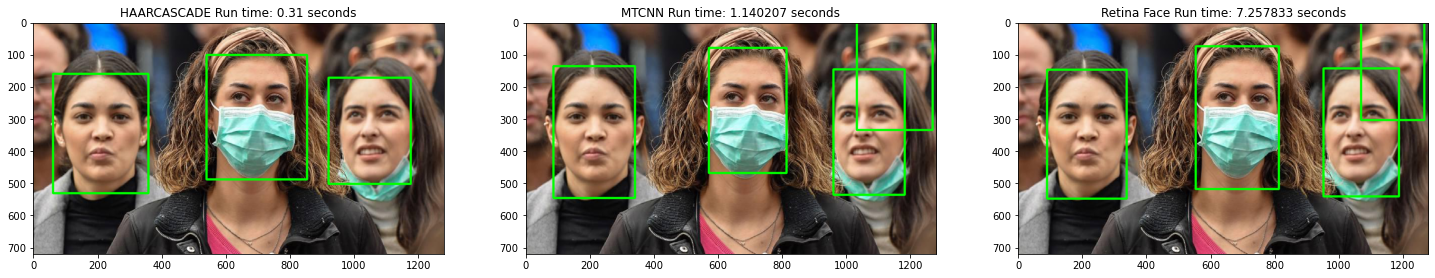

In [105]:
fig, axes = plt.subplots(1,3, figsize=(25,25))
warnings.filterwarnings("ignore")
for mod, i  in zip(['haar','mtcnn','retina'], [0,1,2]):
    predict(test_img[1] ,mod, axes[i])

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


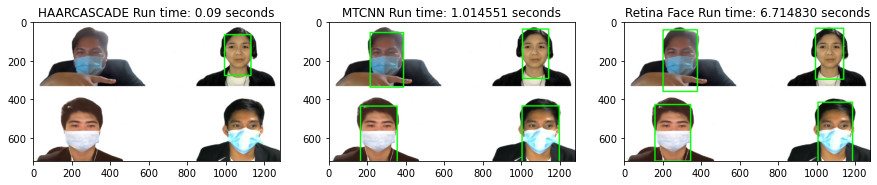

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,15))
warnings.filterwarnings("ignore")
for mod, i  in zip(['haar','mtcnn','retina'], [0,1,2]):
    predict(test_img[8],mod, axes[i])

Comparing the three models, haar cascade also did poorly in identifying the face. MTCNN and retina face did well. 

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


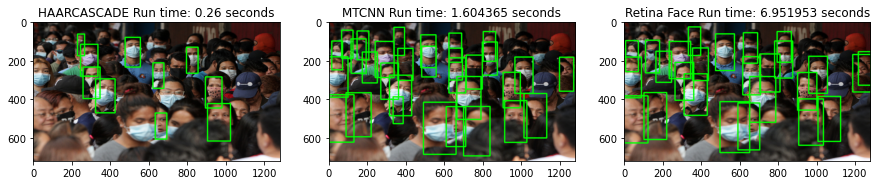

In [45]:
fig, axes = plt.subplots(1,3, figsize=(20,20))
warnings.filterwarnings("ignore")
for mod, i  in zip(['haar','mtcnn','retina'], [0,1,2]):
    predict(test_img[0],mod, axes[i])

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


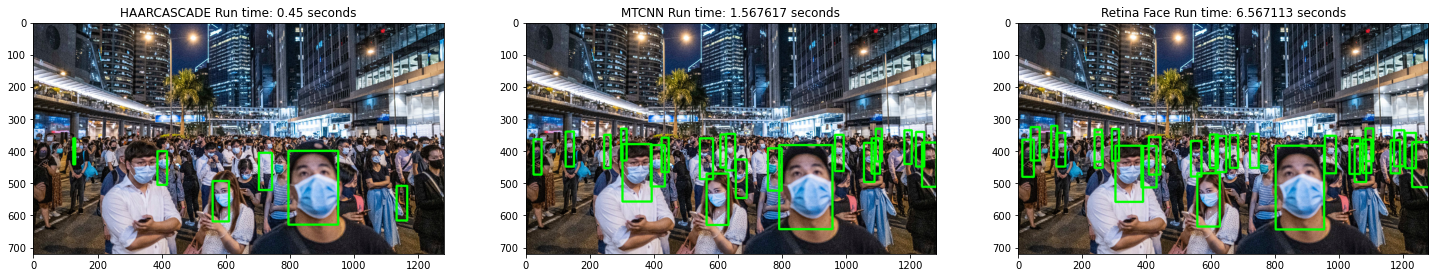

In [106]:
fig, axes = plt.subplots(1,3, figsize=(25,25))
warnings.filterwarnings("ignore")
for mod, i  in zip(['haar','mtcnn','retina'], [0,1,2]):
    predict(test_img[0],mod, axes[i])

In terms of large crowds, HAAR cascade also works very poorly with only a few faces detected. The threshold can be adjusted but takes too much time. MTCNN and Retina face did well but Retina Face detected more faces It is however extremely slow compared to MTCNN. 

MTCNN is a good balance between speed and accuracy in terms of face detection.

In [72]:
def time_retina(image_lists):
    color = (0, 255, 0)
    inference_time = []
    retinaface = insightface.model_zoo.get_model('retinaface_r50_v1')
    retinaface.prepare(ctx_id=-1, nms=0.4)
    for i in image_lists:
        img = np.array(Image.open(i).resize((1280, 720), Image.NEAREST))
        start = time.time()
        bbox, landmark = retinaface.detect(img)
        for box in bbox:
            (x, y, w, h, z) = box.tolist()
            x, y, w, h = int(x), int(y), int(w), int(h)
            cv2.rectangle(img, (x-5, y-25), (w+5, h+60), color, 5)

        end = time.time()
        inference_time.append(exec_time(start, end))

    return np.mean(inference_time)

In [73]:
def time_haar(image_lists):
    color = (0, 255, 0)
    inference_time = []
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 
                                     'haarcascade_frontalface_default.xml')
    for i in image_lists:
        img = np.array(Image.open(i).resize((1280, 720),Image.NEAREST))

        start = time.time()
        faces = face_cascade.detectMultiScale(img)
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x+5, y-5), (x+w-15, y+h+50),
                          color, 5)
        end = time.time()
        inference_time.append(exec_time(start, end))
    return np.mean(inference_time)

In [76]:
def time_mtcnn(image_lists):
    color = (0, 255, 0)
    inference_time = []
    for i in image_lists:
        img = np.array(Image.open(i).resize((1280, 720),Image.NEAREST))
        detector = MTCNN()
        start = time.time()
        try:
            faces = detector.detect_faces(img)
            for f in faces:
                (x, y, w, h) = f['box']
                face_img = img[int(y - 20):int(y+h+50), x-5:x+w+5]                
                cv2.rectangle(img, (x, y-25), (x+w+5, y+h+60),
                          color, 5)
            end = time.time()
            inference_time.append(exec_time(start, end))
        except:
            continue
    
    return np.mean(inference_time)

In [36]:
def predict_compare(image, model, ax):
    """Detects faces in an input image and Predicts Class."""
    img = np.array(Image.open(image).resize((1280, 720),Image.NEAREST))
    color = (0, 255, 0)
    if model == 'retina':
        retinaface = insightface.model_zoo.get_model('retinaface_r50_v1')
        retinaface.prepare(ctx_id = -1, nms=0.4);
        start = time.time()
        bbox, landmark = retinaface.detect(img)
        for box in bbox:
            (x,y,w,h,z) = box.tolist()

            x, y, w, h = int(x), int(y), int(w), int(h)
            face_img = img[int(y - 35):int(h+70), x-5:w+5]
            cv2.rectangle(img, (x-5, y-25), (w+5, h+60), color, 5)

        end = time.time()
        ax.set_title(f'Retina Face Run time: {exec_time(start, end):2f} seconds')
        ax.imshow(img)

    elif model == 'haar':
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 
                                             'haarcascade_frontalface_default.xml')
        start = time.time()
        faces = face_cascade.detectMultiScale(img)
        for (x, y, w, h) in faces:
            face_img = img[int(y - 5):int(y+h+50), x+5:x+w-15]
            cv2.rectangle(img, (x+5, y-5), (x+w-15, y+h+50),
                          color, 5)
        end = time.time()
        ax.set_title(f'HAARCASCADE Run time: {exec_time(start, end):.2f} seconds')
        ax.imshow(img)

    elif model == 'mtcnn':
        detector = MTCNN()
        start = time.time()
        faces = detector.detect_faces(img)
        for f in faces:
            (x, y, w, h) = f['box']
            face_img = img[int(y - 20):int(y+h+50), x-5:x+w+5]                
            cv2.rectangle(img, (x, y-25), (x+w+5, y+h+60),
                      color, 5)
        end = time.time()
        ax.set_title(f'MTCNN Run time: {exec_time(start, end):2f} seconds')
        ax.imshow(img)